# MSPA Software Survey Results and Analysis

The current twelve-course MSPA curriculum includes many courses with primary software identified as Python, R, or SAS. Software systems or languages associated with courses in a typical student curriculum are as follows:

PREDICT 400 Math for Modelers (Python)
PREDICT 401 Introduction to Statistical Analysis (R)
PREDICT 410 Regression and Multivariate Analysis (SAS)
PREDICT 411 Generalized Linear Models (SAS)
PREDICT 413 Time Series Analysis and Forecasting (R)
PREDICT 420 Database Systems and Data Preparation (Python)
PREDICT 422 Practical Machine Learning (R)
PREDICT 450 Marketing Analytics or PREDICT 451 Risk Analytics (R)
PREDICT 452 Web Analytics and Network Data Science or PREDICT 453 Text Analytics (Python)
PREDICT 455 Data Visualization or Other Elective (R)

As you can see, a typical student curriculum includes three courses with Python, five with R, and two with SAS.

The MSPA software survey contained 14 items asking software preferences, gauging interest in future classes, and determining the students current standing in the program.

In [1]:
# external libraries for visualizations and data manipulation
# ensure that these packages have been installed prior to calls
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [2]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

In [3]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

In [4]:
# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

In [8]:
valid_survey_input.head()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


## Language Prefences 

Language preferences include Java/Scala/Spark, JavaScript/HTML/CSS, Python, R, and SAS.  There are questions about each language in regards to personal desire to learn the language, professional expectation of learning the language, and prevelance of the language in the industry.

In [6]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})
    

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']
                     

In [9]:
software_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
RespondentID,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,0,0,0,50,50
5133300037,10,10,50,30,0,25,25,30,20,0,20,25,40,15,0
5132253300,20,0,40,40,0,0,0,40,40,20,30,0,30,40,0
5132096630,10,10,25,35,20,10,10,25,35,20,10,10,25,35,20
5131990362,20,0,0,70,10,20,0,0,80,0,40,0,0,60,0


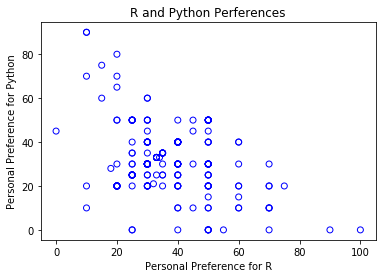

In [10]:
# single scatter plot example
fig, axis = plt.subplots()
axis.set_xlabel('Personal Preference for R')
axis.set_ylabel('Personal Preference for Python')
plt.title('R and Python Perferences')
scatter_plot = axis.scatter(survey_df['My_R'], 
    survey_df['My_Python'],
    facecolors = 'none', 
    edgecolors = 'blue') 


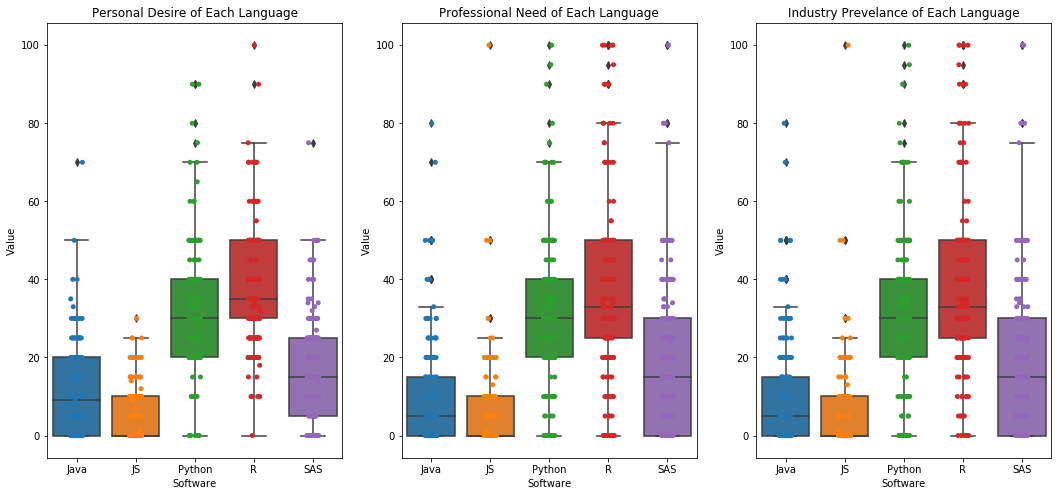

In [43]:
# Boxplots for each language by personal, professional, and industry

pd.options.mode.chained_assignment = None  # default='warn'
personalDF = software_df[['My_Java']]
personalDF['Software'] = 'Java'
personalDF.columns = ['Value', 'Software']

personalDF1 = software_df[['My_JS']]
personalDF1['Software'] = 'JS'
personalDF1.columns = ['Value', 'Software']

personalDF2 = software_df[['My_Python']]
personalDF2['Software'] = 'Python'
personalDF2.columns = ['Value', 'Software']

personalDF3 = software_df[['My_R']]
personalDF3['Software'] = 'R'
personalDF3.columns = ['Value', 'Software']

personalDF4 = software_df[['My_SAS']]
personalDF4['Software'] = 'SAS'
personalDF4.columns = ['Value', 'Software']

personalDF = personalDF.append(personalDF1, ignore_index=True)
personalDF = personalDF.append(personalDF2, ignore_index=True)
personalDF = personalDF.append(personalDF3, ignore_index=True)
personalDF = personalDF.append(personalDF4, ignore_index=True)


profDF = software_df[['Prof_Java']]
profDF['Software'] = 'Java'
profDF.columns = ['Value', 'Software']

profDF1 = software_df[['Prof_JS']]
profDF1['Software'] = 'JS'
profDF1.columns = ['Value', 'Software']

profDF2 = software_df[['Prof_Python']]
profDF2['Software'] = 'Python'
profDF2.columns = ['Value', 'Software']

profDF3 = software_df[['Prof_R']]
profDF3['Software'] = 'R'
profDF3.columns = ['Value', 'Software']

profDF4 = software_df[['Prof_SAS']]
profDF4['Software'] = 'SAS'
profDF4.columns = ['Value', 'Software']

profDF = profDF.append(profDF1, ignore_index=True)
profDF = profDF.append(profDF2, ignore_index=True)
profDF = profDF.append(profDF3, ignore_index=True)
profDF = profDF.append(profDF4, ignore_index=True)

indDF = software_df[['Prof_Java']]
indDF['Software'] = 'Java'
indDF.columns = ['Value', 'Software']

indDF1 = software_df[['Prof_JS']]
indDF1['Software'] = 'JS'
indDF1.columns = ['Value', 'Software']

indDF2 = software_df[['Prof_Python']]
indDF2['Software'] = 'Python'
indDF2.columns = ['Value', 'Software']

indDF3 = software_df[['Prof_R']]
indDF3['Software'] = 'R'
indDF3.columns = ['Value', 'Software']

indDF4 = software_df[['Prof_SAS']]
indDF4['Software'] = 'SAS'
indDF4.columns = ['Value', 'Software']

indDF = indDF.append(indDF1, ignore_index=True)
indDF = indDF.append(indDF2, ignore_index=True)
indDF = indDF.append(indDF3, ignore_index=True)
indDF = indDF.append(indDF4, ignore_index=True)


f,ax=plt.subplots(1,3,figsize=(18,8))

ax[0]= sns.boxplot(x="Software", y="Value", data=personalDF,ax=ax[0])
ax[0]= sns.stripplot(x="Software", y="Value", data=personalDF, jitter=True, edgecolor="gray",ax=ax[0])

ax[1]= sns.boxplot(x="Software", y="Value", data=profDF,ax=ax[1])
ax[1]= sns.stripplot(x="Software", y="Value", data=profDF, jitter=True, edgecolor="gray",ax=ax[1])

ax[2]= sns.boxplot(x="Software", y="Value", data=indDF,ax=ax[2])
ax[2]= sns.stripplot(x="Software", y="Value", data=indDF, jitter=True, edgecolor="gray",ax=ax[2])

ax[0].title.set_text('Personal Desire of Each Language')
ax[1].title.set_text('Professional Need of Each Language')
ax[2].title.set_text('Industry Prevelance of Each Language')

plt.show()

R appears to be the language with the most interest in each area followed closely by Python.  There seems to be little interest in JavaScript/HTML/CSS as compared to the other languages.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

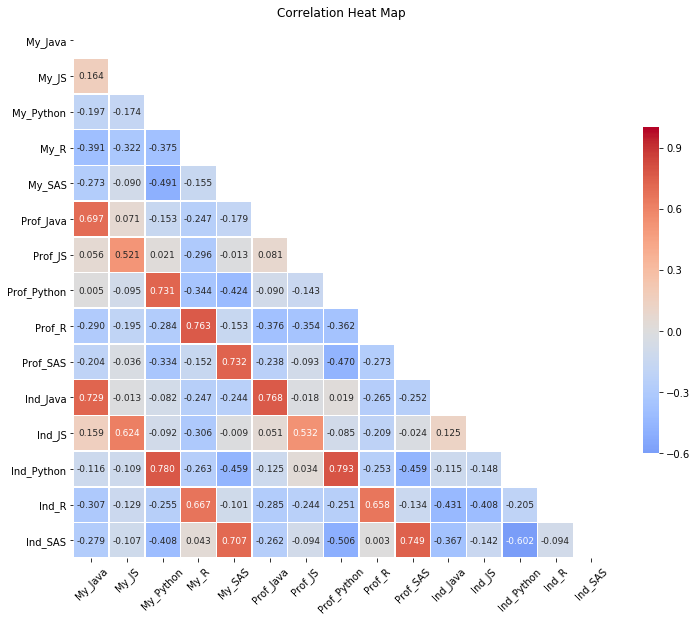

In [32]:
# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = software_df)

A students personal answer is correlated with their industry answer or their professional answer.  That is if a student gave many points for Python based on their desire to learn that language they were more likely to give Python many points on both the professional need and prevelance questions.  

In [58]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
software_dfDescribe = pd.DataFrame(software_df.describe())
software_dfDescribe


Descriptive statistics for survey data ---------------


,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,Ind_Java,Ind_JS,Ind_Python,Ind_R,Ind_SAS
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000


## Student Interest In Potential New Courses

The School of Professional Studies is thinking about offering four new courses relating to information technology for data science, or what is sometimes called data engineering. These courses would count as electives in the MSPA program. The next four questions ask for your level of interest in each of the follwoing proposed elective courses:

1. Python for Data Analysis. Python programming language is becoming the language of choice for programmers and practitioners when dealing with a broad set of data analysis tasks. In this course, the students will learn the basic programming constructs and packages in Python. Students will acquire Python programming skills to store, retrieve, process, and transform data from different data sources, including SQL database engines. The course will discuss Python packages such as Pandas and Matplotlib that are used for data-intensive applications, data analysis, exploratory computing and data visualization when generating the statistical data analysis reports that are used to support the decision-making process. This is a programming-based course that will harness the expressive power of Python in tackling a broad set of data analysis, statistical computing, and information processing problems. Prerequisites: None. [Likely language and system: Python and Jupyter notebook.]
2. Foundations of Data Engineering. This course provides an overview of software and systems for data science as well as methods of software development. Students learn about computer languages while working on data and text analysis projects. Students gain experience with open-source software, text editors, and integrated development environments. They employ best practices in software development, utilizing tools for syntax checking, testing, debugging, and version control. Prerequisites: None. [Likely languages and systems: Python, R, and Jupyter notebook.]
3. Analytics Application Development. This course covers programming components essential to the development of analytics applications. The focus is analytics software engineering. Students learn to develop single-system/desktop solutions as well as client-server solutions. They learn about web-based, client-server solutions employing a variety of front-end and back-end system components. Students develop software, working on open-source programming, database, and systems integration projects. They employ best practices in software development. Prerequisites: Database Systems and Data Preparation. [Likely languages and systems: Python, JavaScript/HTML/CSS, Linux bash shell, relational and NoSQL database systems.]
4. Data Science Systems Analysis. This course provides a detailed treatment of software and systems for data science as well as methods for testing and evaluating software and systems. Students learn about the systems architecture, alternative software stacks, design of scalable systems, and computer system security. Students gain experience with methods for benchmarking analytics software in production environments, testing system performance across various system loads. The learn tools of systems analysis as applied to stand-alone and distributed systems. They evaluate benefits and risks associated with in-house versus cloud-based distributed systems. Prerequisites: Database Systems and Data Preparation. [Likely languages and systems: Python, R, Java/Scala/Spark, JavaScript/HTML/CSS, Linux bash shell, relational and NoSQL database systems.]

In [44]:
survey_df.head()

,My_Java,My_JS,My_Python,My_R,My_SAS,Prof_Java,Prof_JS,Prof_Python,Prof_R,Prof_SAS,...,PREDICT453,PREDICT454,PREDICT455,PREDICT456,PREDICT457,OtherPython,OtherR,OtherSAS,Other,Graduate_Date
RespondentID,,,,,,,,,,,,,,,,,,,,,
5135740122,0,0,0,50,50,0,0,0,25,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5133300037,10,10,50,30,0,25,25,30,20,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring 2018
5132253300,20,0,40,40,0,0,0,40,40,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018
5132096630,10,10,25,35,20,10,10,25,35,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2017
5131990362,20,0,0,70,10,20,0,0,80,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CS-435 with Weka,Fall 2018


In [47]:
interestDf = survey_df.loc[:, 'Python_Course_Interest':'Courses_Completed']

In [48]:
interestDf.head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
RespondentID,,,,,
5135740122,50.0,90.0,51.0,50.0,NaN
5133300037,20.0,50.0,90.0,50.0,6.0
5132253300,100.0,70.0,100.0,60.0,4.0
5132096630,85.0,60.0,90.0,82.0,7.0
5131990362,60.0,10.0,40.0,80.0,7.0


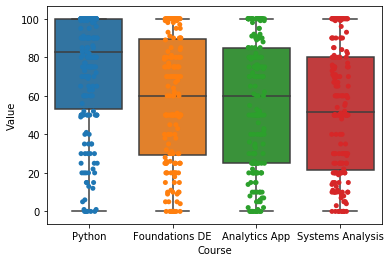

In [51]:
intDF = interestDf[['Python_Course_Interest', 'Courses_Completed']]
intDF['Course'] = 'Python'
intDF.columns = ['Value', 'Courses_Completed', 'Course']

intDF1 = interestDf[['Foundations_DE_Course_Interest', 'Courses_Completed']]
intDF1['Course'] = 'Foundations DE'
intDF1.columns = ['Value', 'Courses_Completed', 'Course']

intDF2 = interestDf[['Analytics_App_Course_Interest', 'Courses_Completed']]
intDF2['Course'] = 'Analytics App'
intDF2.columns = ['Value', 'Courses_Completed', 'Course']

intDF3 = interestDf[['Systems_Analysis_Course_Interest', 'Courses_Completed']]
intDF3['Course'] = 'Systems Analysis'
intDF3.columns = ['Value', 'Courses_Completed', 'Course']

intDF = intDF.append(intDF1, ignore_index=True)
intDF = intDF.append(intDF2, ignore_index=True)
intDF = intDF.append(intDF3, ignore_index=True)

sns.boxplot(x="Course", y="Value", data=intDF)
sns.stripplot(x="Course", y="Value", data=intDF, jitter=True, edgecolor="gray")

There appears to be the most interest in a Python course and the least amount of interest in a Systems Analysis course.  

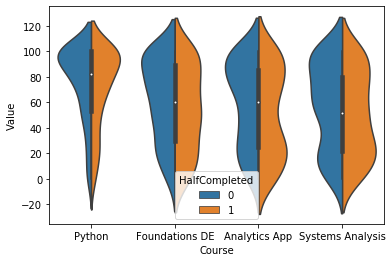

In [54]:
intDF['HalfCompleted'] = np.where(intDF['Courses_Completed']>=6, 1, 0)
sns.violinplot("Course","Value", hue="HalfCompleted", data=intDF,split=True)

The answer does not appear to differ based upon the number of classes completed.  The distribution of answers for those students who have completed more than half of the required classes is the same as the distribution of answers for those students who have not yet completed half of the required classes.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


<Figure size 432x288 with 0 Axes>

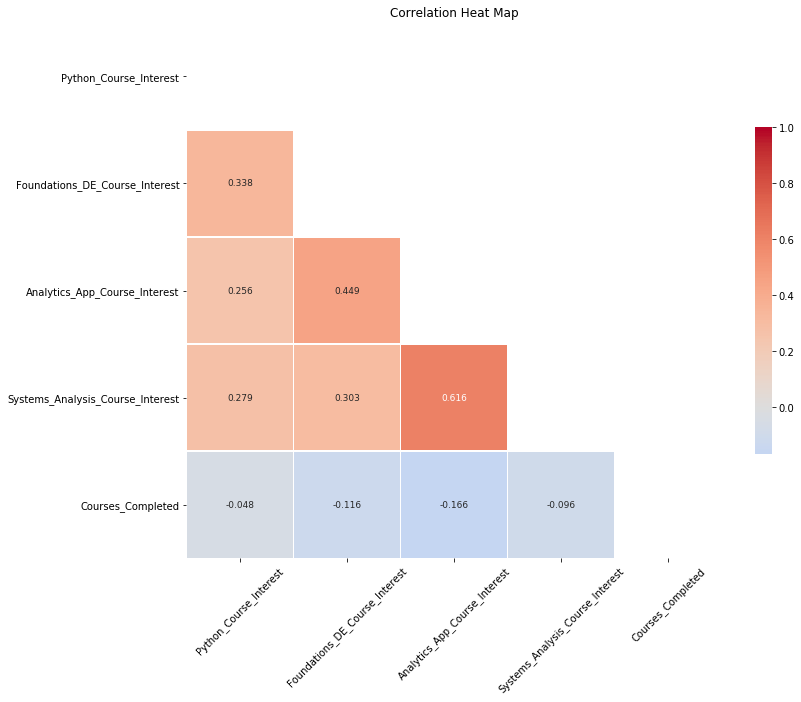

In [55]:
# examine intercorrelations among class preference variables
# with correlation matrix/heat map
corr_chart(df_corr = interestDf)

In [57]:
# descriptive statistics for class preference variables
print('\nDescriptive statistics for survey data ---------------')
interestDfDescribe = pd.DataFrame(interestDf.describe())
interestDfDescribe


Descriptive statistics for survey data ---------------


,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,206.000000,200.000000,203.000000,200.000000,187.000000
mean,73.529126,58.045000,55.201970,53.630000,6.342246
std,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,53.000000,29.500000,25.000000,21.500000,4.000000
50%,82.500000,60.000000,60.000000,51.500000,6.000000
75%,100.000000,89.250000,85.000000,80.250000,9.000000
max,100.000000,100.000000,100.000000,100.000000,12.000000


## Transformations

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

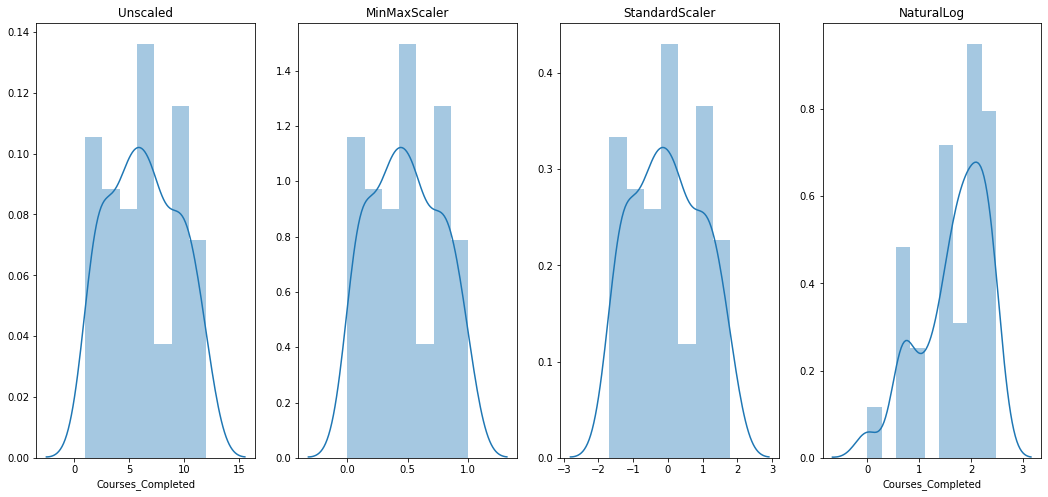

In [80]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = survey_df['Courses_Completed'].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

f,ax=plt.subplots(1,4,figsize=(18,8))
sns.distplot(X,ax=ax[0]).set_title('Unscaled')
sns.distplot(MinMaxScaler().fit_transform(survey_df[['Courses_Completed']].dropna()),ax=ax[1]).set_title('MinMaxScaler')
sns.distplot(StandardScaler().fit_transform(survey_df[['Courses_Completed']].dropna()),ax=ax[2]).set_title('StandardScaler')
sns.distplot(np.log(X),ax=ax[3]).set_title('NaturalLog')
plt.show()

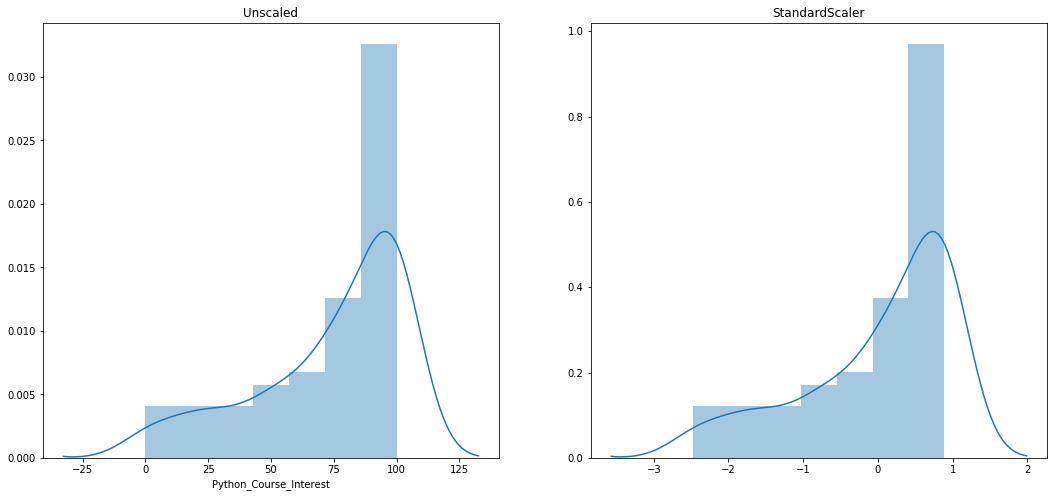

In [84]:
# transformations a la Scikit Learn
# select variable to examine, eliminating missing data codes
X = interestDf['Python_Course_Interest'].dropna()

# Seaborn provides a convenient way to show the effects of transformations
# on the distribution of values being transformed
# Documentation at https://seaborn.pydata.org/generated/seaborn.distplot.html

# Only unscaled and the standard scaler work for the class interest variables or any of the programing 
# language prefences due to the presence of 0's

f,ax=plt.subplots(1,2,figsize=(18,8))
sns.distplot(X,ax=ax[0]).set_title('Unscaled')
sns.distplot(StandardScaler().fit_transform(interestDf[['Python_Course_Interest']].dropna()),ax=ax[1]).set_title('StandardScaler')
plt.show()

In [89]:
interestDfScale = pd.DataFrame(StandardScaler().fit_transform(interestDf.dropna()))
interestDfScale.columns = interestDf.columns

In [90]:
interestDfScale.head()

,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
0,-1.856977,-0.208093,1.014707,-0.088333,-0.114449
1,0.877413,0.404355,1.306852,0.204446,-0.743921
2,0.364715,0.098131,1.014707,0.848560,0.200286
3,-0.489782,-1.432991,-0.446020,0.790004,0.200286
4,0.535614,-0.208093,0.576489,0.790004,-0.429185


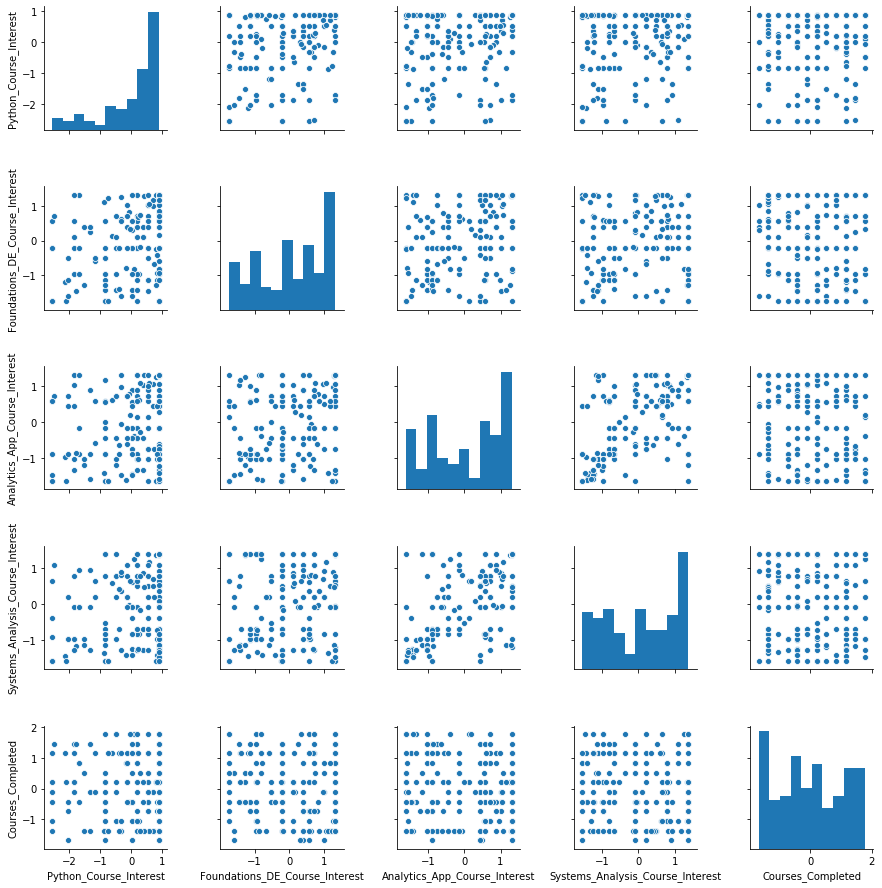

In [91]:
sns.pairplot(interestDfScale)

## Conclusion

There is a strong current preference for R among students however Python appears to be gaining ground as seen in the ratings for future classes that could be offered.  SAS appears to be on the downswing and JavaScript/HTML/CSS is not very popular at all.  It appears that most student are interested in data engineering and classes on those topics would be beneficial for students.